In [2]:
from extract_data import extarct_data
from config.config import config


In [3]:
df=extarct_data().drop(['Articles De Toilettage',
'Balcon',
 'Chauffage',
 'Climatisation',
 'Concierge',
 'Cuisine Équipée',
 'Duplex',
 'Fer À Repasser',
 'Garage',
 'Machine À Laver',
 'Meublé',
 'Parking',
 'Serviettes',
 'Sécurité',
 'jour',
 'year',
 'month',
 'Terrasse',
 'Télévision',
 'WIFI'],axis=1)
df

,price,nb rooms,nb baths,surface area,Ascenseur,ville
0,-2.211455,-2.293100,-0.894736,-0.597365,0,26
1,-2.230049,-0.483449,0.520454,0.246433,1,26
2,-2.431082,3.107139,0.520454,0.222611,1,14
3,-2.434868,-0.483449,0.520454,0.222611,1,14
4,0.008557,0.905145,0.520454,0.577952,0,18
...,...,...,...,...,...,...
16915,0.190079,-2.293100,-0.894736,7.396063,1,40
16916,0.190079,-2.293100,-0.894736,7.396063,1,40
16917,0.392051,0.763811,0.376413,0.966317,1,40
16918,-1.177228,-0.483449,-0.894736,-1.585032,1,40


In [4]:
df.corr()

,price,nb rooms,nb baths,surface area,Ascenseur,ville
price,1.000000,0.177766,0.295783,0.463924,0.193376,0.105447
nb rooms,0.177766,1.000000,0.388758,0.314543,0.019093,-0.082212
nb baths,0.295783,0.388758,1.000000,0.347212,0.003365,-0.205485
surface area,0.463924,0.314543,0.347212,1.000000,0.137262,0.104746
Ascenseur,0.193376,0.019093,0.003365,0.137262,1.000000,0.102483
ville,0.105447,-0.082212,-0.205485,0.104746,0.102483,1.000000


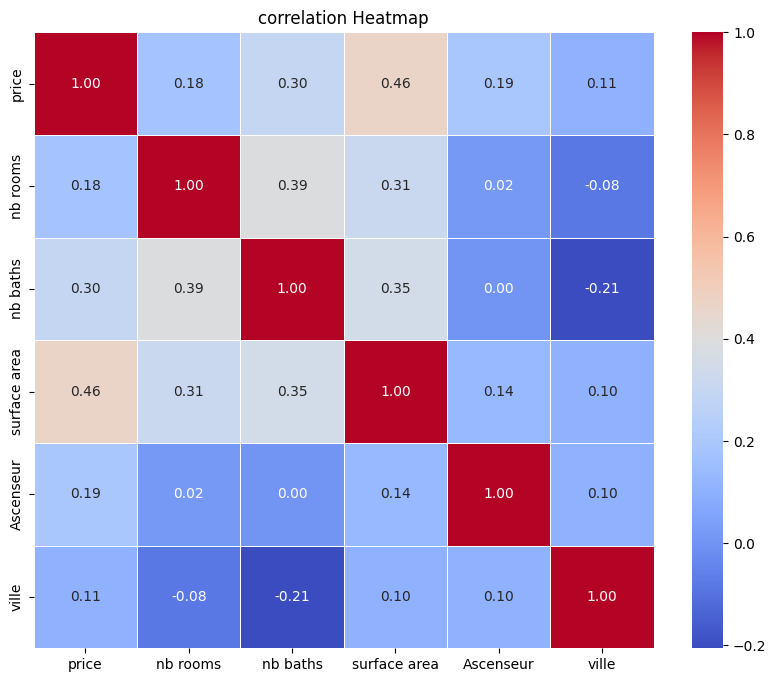

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [4]:
df.columns.to_list()

['price', 'nb rooms', 'nb baths', 'surface area', 'Ascenseur', 'ville']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



x ,y = df[['price', 'nb rooms', 'nb baths', 'surface area',  'ville']],df['Ascenseur']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

the first model : LogisticRegression


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1)

model.fit(x_train,y_train)

LogisticRegression(n_jobs=-1)

In [7]:
model.score(x_test,y_test)

0.8043735224586288

In [8]:
y_pred = model.predict(x_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.8043735224586288
precision (Precision): 0.8066528066528067
rappel (Recall): 0.995966263292996
score F1: 0.8913685592385954


In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.1, 1, 10],  
    'solver': ['liblinear', 'saga'], 
}

grid_model = GridSearchCV(model,param_grid=param_grid,cv=5)
grid_model.fit(x_train,y_train)


/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/ali/Desktop/machine learning /venv/lib/python3.12/site-package

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [11]:
grid_model.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [12]:
model = grid_model.best_estimator_
y_pred = model.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.8046690307328606
precision (Precision): 0.8067102137767221
rappel (Recall): 0.9963329666299964
score F1: 0.8915504511894996


 module : Arbre de décision

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(x_test,y_test)


0.9497635933806147

In [16]:
y_pred = model.predict(x_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.9497635933806147
precision (Precision): 0.9729929707732149
rappel (Recall): 0.9644297763109644
score F1: 0.9686924493554327


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 10, 20], 
    'min_samples_leaf': [1, 5, 10], 
    'criterion': ['gini', 'entropy'],  
}


grid_model = GridSearchCV(model,param_grid=param_grid,cv=5)
grid_model.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [19]:
model = grid_model.best_estimator_
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.9533096926713948
precision (Precision): 0.9731123388581953
rappel (Recall): 0.9688302163549688
score F1: 0.9709665564130834


model : Forêt aléatoire

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.9592198581560284

In [21]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.9592198581560284
precision (Precision): 0.9674972914409534
rappel (Recall): 0.9823982398239824
score F1: 0.9748908296943232


In [22]:
param_grid = {
    'n_estimators': [100, 200, 500], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 10],  
    'min_samples_leaf': [1, 5],  
    'bootstrap': [True, False],  
}



grid_model = GridSearchCV(model,param_grid=param_grid,cv=5)
grid_model.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200, 500]})

In [23]:
model = grid_model.best_estimator_
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.95951536643026
precision (Precision): 0.9685238784370478
rappel (Recall): 0.9816648331499817
score F1: 0.9750500819522856


model : SVM

In [24]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8058510638297872

In [25]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 

exactitude (Accuracy): 0.8058510638297872
precision (Precision): 0.8058510638297872
rappel (Recall): 1.0
score F1: 0.8924889543446245


In [ ]:
param_grid= {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
}



grid_model = GridSearchCV(model,param_grid=param_grid,cv=5)
grid_model.fit(x_train,y_train)


In [ ]:
model = grid_model.best_estimator_
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"exactitude (Accuracy): {accuracy}")  
print(f"precision (Precision): {precision}")  
print(f"rappel (Recall): {recall}")  
print(f"score F1: {f1}") 